# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
whole = pd.read_csv('Wholesale_Data.csv')
whole.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# Generate summary statistics
whole.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [3]:
# Looking for Outliers
top_10Fresh = whole['Fresh'].nlargest(10)
top_10Milk = whole['Milk'].nlargest(10)
top_10Grocery = whole['Grocery'].nlargest(10)
top_10Frozen = whole['Frozen'].nlargest(10)
top_10Detergents_Paper = whole['Detergents_Paper'].nlargest(10)
top_10Delicassen = whole['Delicassen'].nlargest(10)

print(top_10Fresh)
print(top_10Milk)
print(top_10Grocery)
print(top_10Frozen)
print(top_10Detergents_Paper)
print(top_10Delicassen)

181    112151
125     76237
284     68951
39      56159
258     56083
103     56082
259     53205
282     49063
239     47493
176     45640
Name: Fresh, dtype: int64
86     73498
47     54259
85     46197
183    43950
61     38369
23     36423
56     29892
181    29627
211    28326
92     27472
Name: Milk, dtype: int64
85     92780
333    67298
61     59598
47     55571
65     45828
211    39694
216    36486
145    34792
251    33586
86     32114
Name: Grocery, dtype: int64
325    60869
183    36534
93     35009
196    18711
103    18028
413    17866
277    16919
181    16745
125    16538
338    15601
Name: Frozen, dtype: int64
85     40827
333    38102
61     26701
65     24231
47     24171
86     20070
211    19410
92     18906
251    18594
56     17740
Name: Detergents_Paper, dtype: int64
183    47943
23     16523
71     14472
87     14351
181     8550
2       7844
202     6854
47      6465
218     6372
171     6250
Name: Delicassen, dtype: int64


In [4]:
# Handling Missing Values
# Count the number of 0 values in each column
zero_counts = (whole == 0).sum()

# Print the counts
print(zero_counts)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [5]:
# Handling Missing Values
# Count the nulls in each column
null_counts = whole.isnull().sum()
print(null_counts)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [6]:
# Calculate the IQR and identify outliers
Q1 = whole.quantile(0.25)
Q3 = whole.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((whole < (Q1 - 1.5 * IQR)) | (whole > (Q3 + 1.5 * IQR)))
outliers
# out_counts = (outliers == 'True').sum()
# out_counts
out_dum = outliers.astype(int)
out_dum.describe()

# For compare and contrast with and without outliers
# Drop outliers from the dataframe
whole_no_outliers = whole[~outliers.any(axis=1)]
whole_no_outliers.shape

(332, 8)

In [11]:
whole.shape

(440, 8)

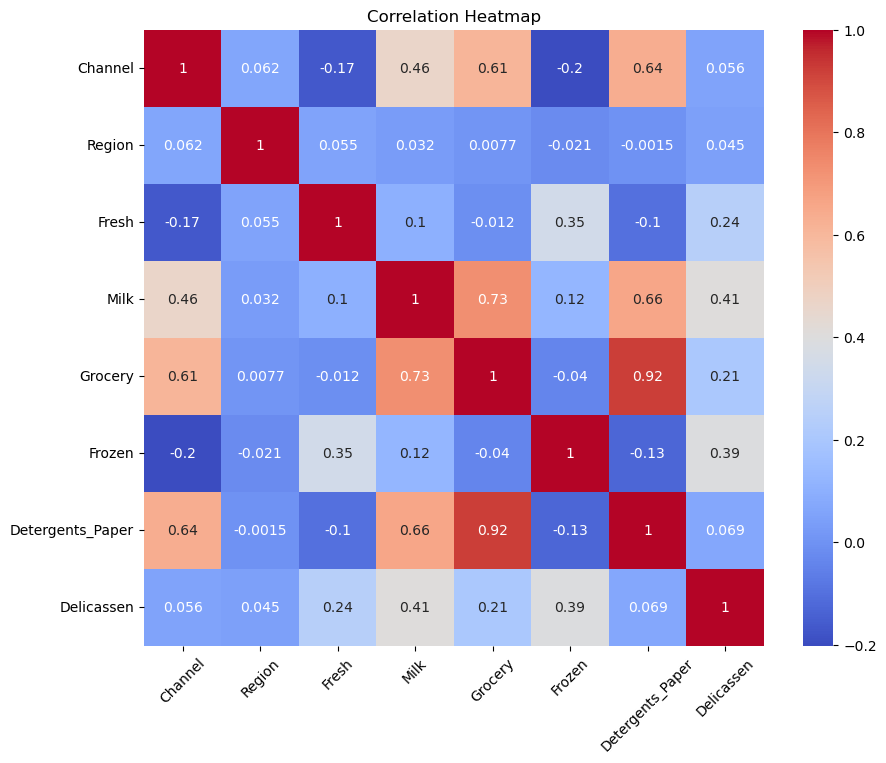

In [7]:
# Generate the correlation matrix for the entire Wholesale df
correlation_matrix = whole.corr()

# print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
# Create the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

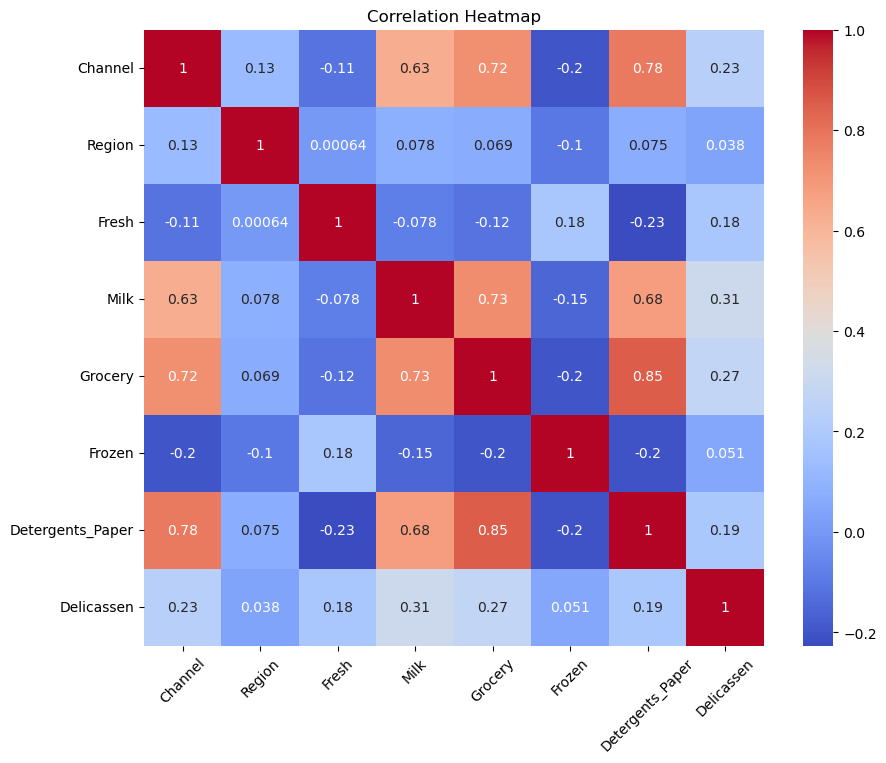

In [8]:
# Generate the correlation matrix for the df with outliers removed
correlation_matrix = whole_no_outliers.corr()

# print(correlation_matrix)

import seaborn as sns
import matplotlib.pyplot as plt
# Create the correlation heatmap using seaborn
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Customize the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# Dimension reduction: There are some high correlations among some categories, so some Might not be needed all of them. Region has a low correlation with all, so it might not be adding much useful information to the model. Channels already are de facto clusters. Delicassen doesn't have a strong relationship with anything. Grocery, a category that overlaps with others, has strong correlations with Milk (0.73) and Detergents_Paper (0.85), so it might not be necessary if the other two are in the model.

In [43]:
whole4 = whole.drop(['Channel', 'Region', 'Grocery', 'Delicassen'], axis=1)

In [59]:
# Data Preparation
# Scaling Full Model 'whole' with 8 features and Reduced Model 'whole4' with 4 features (Fresh, Frozen, Milk, Detergents_Paper)
# standarized Full whole
from sklearn.preprocessing import StandardScaler
scaled_whole = StandardScaler().fit_transform(whole)
# standarized Reduced whole4
scaled_whole4 = StandardScaler().fit_transform(whole4)

# No Outliers Full and Reduced Models scaled
scaled_wno = StandardScaler().fit_transform(whole_no_outliers) #Full scaled
whole4_no_outliers = whole_no_outliers.drop(['Channel', 'Region', 'Grocery', 'Delicassen'], axis=1) #Reduced model without outliers
scaled_w4no = StandardScaler().fit_transform(whole_no_outliers) #Reduced scaled

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

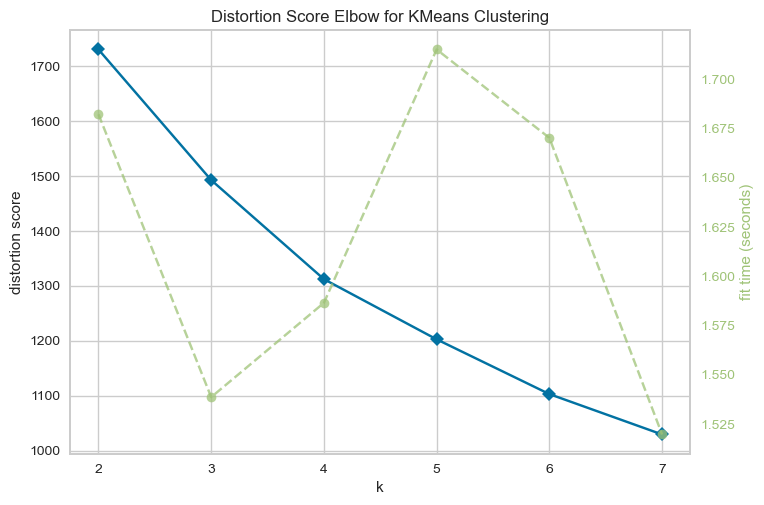

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# KMeans Full Model
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Create an instance of the KMeans class
# km = KMeans(n_clusters=3)

# Fit the model to your data
# km.fit(scaled_wno)

# Make predictions
# labels = km.predict(scaled_wno)

# Get the cluster centers
# cluster_centers = km.cluster_centers_

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,8))
 
visualizer.fit(scaled_wno)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Rate of reduction in Distortion Scores does go down after moving from k=3 to k=4. The optimal number is k=4.

In [ ]:
# def plot_clusters(X,y_res, plt_cluster_centers = False):
#     X_centroids = []
#     Y_centroids = []
    
#     for cluster in set(y_res):
#         x = X[y_res == cluster,0]
#         y = X[y_res == cluster,1]
#         X_centroids.append(np.mean(x))
#         Y_centroids.append(np.mean(y))
        
#         plt.scatter(x,
#                     y,
#                     s=50,
#                     marker='s',
#                     label=f'cluster {cluster}')
        
#     if plt_cluster_centers:
#         plt.scatter(X_centroids,
#                     Y_centroids,
#                     marker='*',
#                     c='red',
#                     s=250,
#                     label='centroids')
#     plt.legend()
#     plt.grid()
#     plt.show()


c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Wi

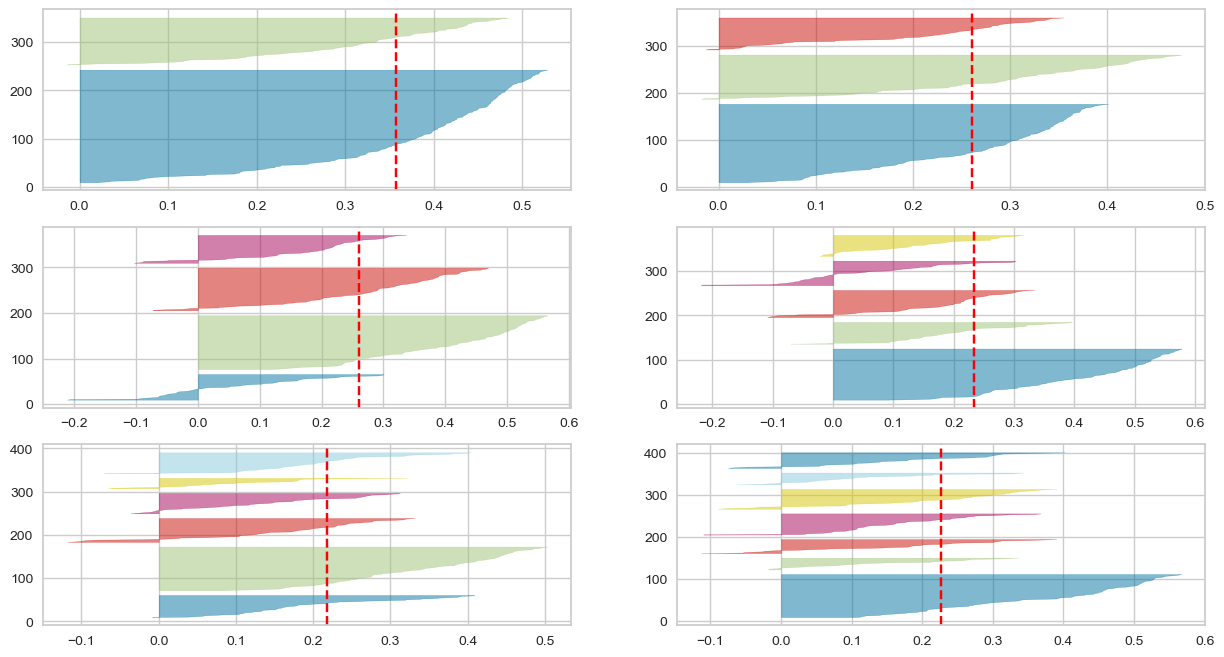

In [61]:
# Silhouette method for determining optimal number of clusters with Full Model
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_wno)

All clusters have scores above the average score for the dataset (represented by the red dashed line), a criterion in Silhouette selection. None of the Silhouette graphs is ideal because of the variance in the width of the clusters, with k=3-5 clusters looking the most even. Combining the results of the Elbow and Silhouette method suggest k=4 is the best.

In [115]:
# Full Model
# import plotly.graph_objs as go
# K-means using k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_wno)
y_kmeans = kmeans.predict(scaled_wno)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'Detergents_Paper -->'),yaxis = dict(title  = 'Frozen -->'),zaxis = dict(title  = 'Milk -->'))

labels = kmeans.labels_
# Create the scatter plot
trace = go.Scatter3d(
    x=whole_no_outliers['Detergents_Paper'],
    y=whole_no_outliers['Frozen'],
    z=whole_no_outliers['Milk'],
    mode='markers',
    marker=dict(color=labels, size=10, line=dict(color='black', width=10))
)
# Set the layout and create the plot
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()


c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Wi

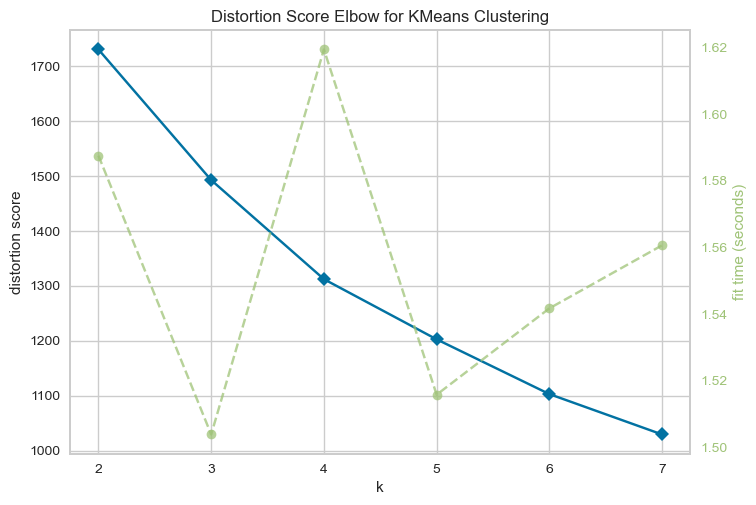

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
# Repeat with Reduced Model whole4 with Frozen, Fresh, Milk, and Detergents_Paper
# Instantiate the clustering model and visualizer
km4 = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,8))
 
visualizer.fit(scaled_w4no)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Same as with full model, k=4 clusters from Elbow method.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Wi

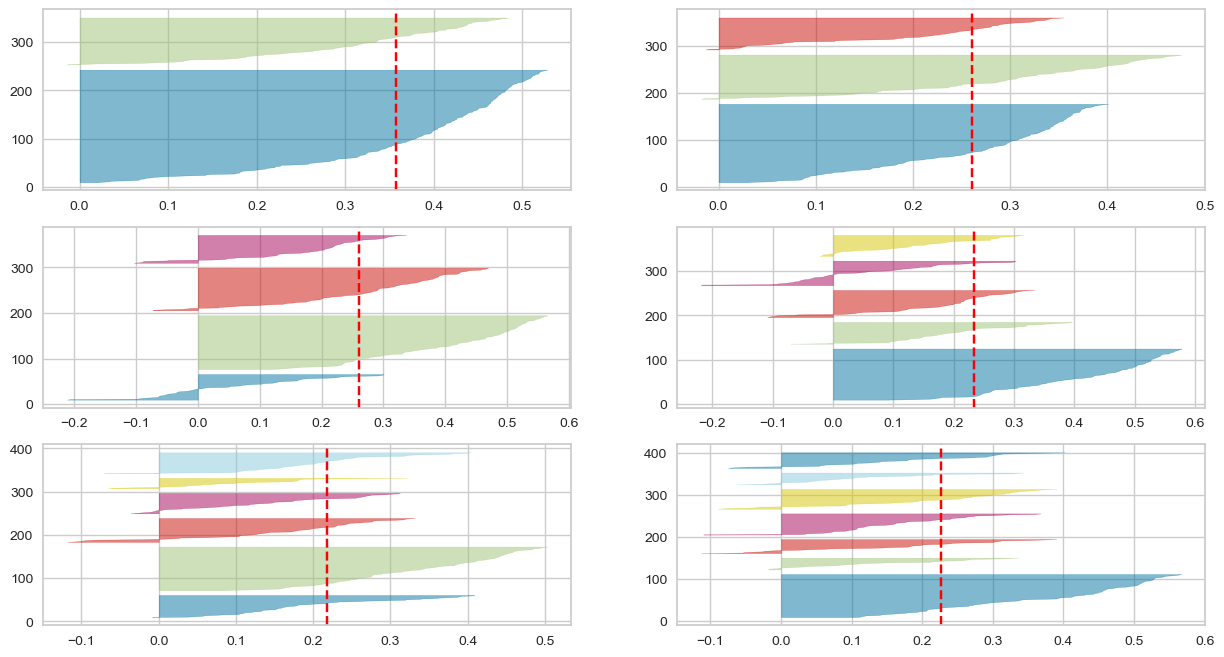

In [68]:
# Silhouette method for determining optimal number of clusters with Reduced Model
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2,3, 4, 5,6,7]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km4 = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km4, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_w4no)

Reduced Model Whole 4: While less than clear, all clusters have scores greater than the average for the dataset but still a fair about of difference in cluster widths. Given the 4 from the Elbow method, 4 will be the choice here.

In [69]:
# Reduced Model 3D graph
import plotly.graph_objs as go
## K-means using k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_w4no)
y_kmeans = kmeans.predict(scaled_w4no)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'Detergents_Paper -->'),yaxis = dict(title  = 'Frozen -->'),zaxis = dict(title  = 'Milk -->'))

labels = kmeans.labels_
# Create the scatter plot
trace = go.Scatter3d(
    x=whole4_no_outliers['Detergents_Paper'],
    y=whole4_no_outliers['Frozen'],
    z=whole4_no_outliers['Milk'],
    mode='markers',
    marker=dict(color=labels, size=10, line=dict(color='black', width=10))
)
# Set the layout and create the plot
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\User\anaconda3\envs\thisone\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [35]:
# Full Model
# Agglomerative clustering
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
# Cluster hierarchy
import scipy.cluster.hierarchy as sch


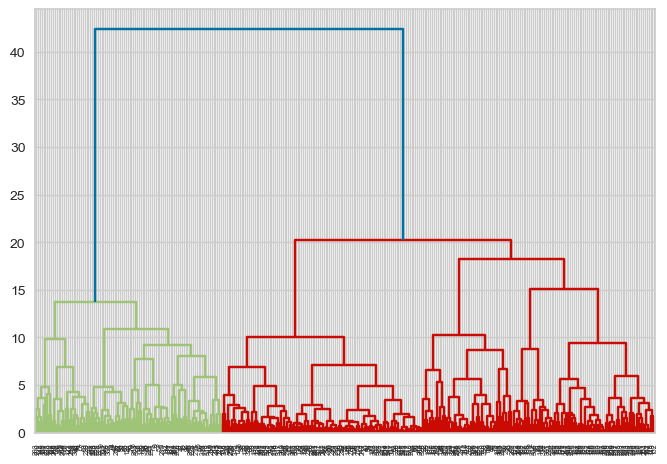

In [70]:
# Dendrogram to choose number of clusters for Full Model
# Choose two variables for graphing purposes: Fresh and Detergents_Paper
# X = scaled_wno.iloc[:, [3, 7]].values

dendrogram = sch.dendrogram(sch.linkage(scaled_wno, method='ward'))

The greatest vertical distance between two splits in the dendrogram is along the blue lines at the top of the graph. There are two vertical lines between approximately 42 and 20 along the y-axis, so two clusters is optimal here. 

In [71]:
# Full Model

model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model.fit(scaled_wno)
labels = model.labels_

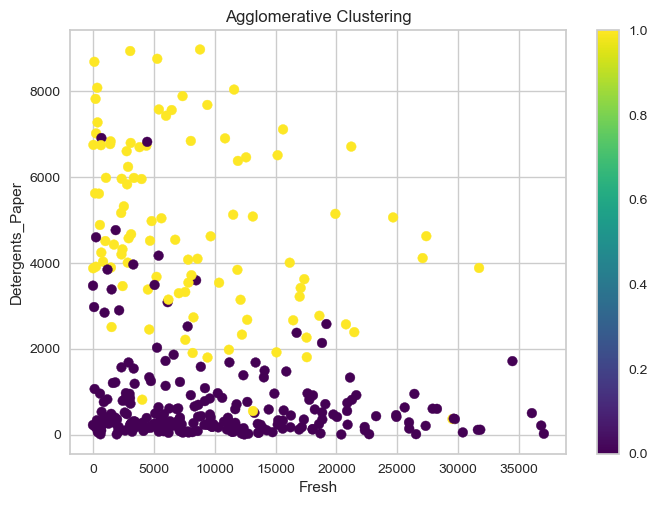

In [73]:
# Create a scatter plot of the Full Model's data points
plt.scatter(whole_no_outliers['Fresh'], whole_no_outliers['Detergents_Paper'], c=labels, cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Agglomerative Clustering')
plt.colorbar()

plt.show()

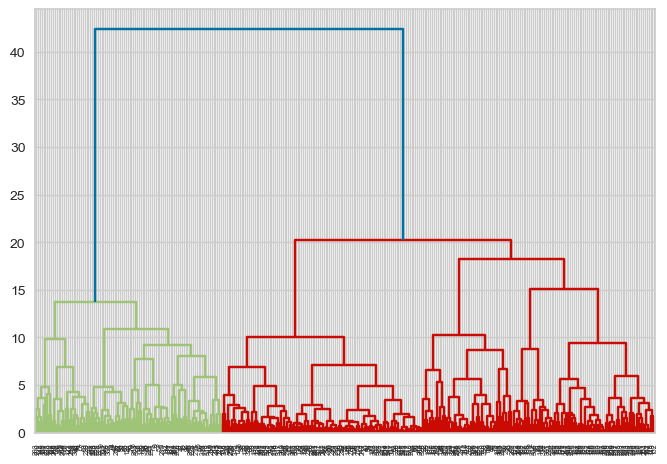

In [76]:
# Reduced Model
# Dendrogram to choose number of clusters
# Choose two variables for graphing purposes: Fresh and Detergents_Paper
# X = scaled_w4no.iloc[:, [1, 4]].values

dendrogram = sch.dendrogram(sch.linkage(scaled_w4no, method='ward'))

The greatest vertical distance is at the blue lines first split, suggesting 2 clusters for the Reduced Model.

In [74]:
# Reduced Model hierarchical agglomerative
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
model.fit(scaled_w4no)
labels = model.labels_

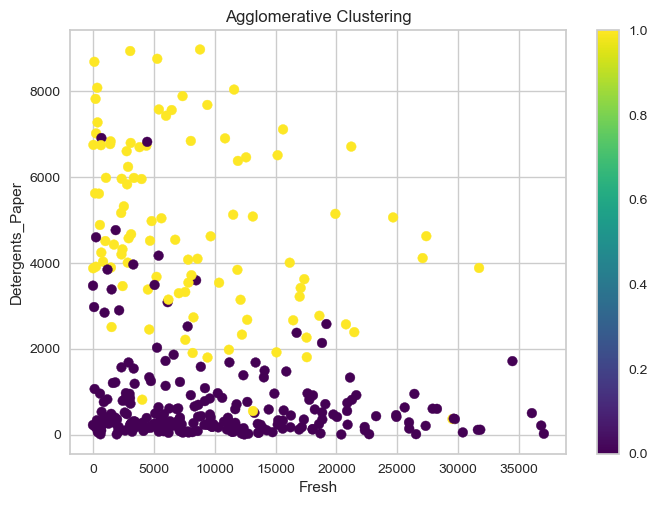

In [75]:
# Create a scatter plot of the Reduced Model data points
plt.scatter(whole4_no_outliers['Fresh'], whole4_no_outliers['Detergents_Paper'], c=labels, cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Detergents_Paper')
plt.title('Agglomerative Clustering')
plt.colorbar()

plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [77]:
# PCA Full Model with 8 features
from sklearn.decomposition import PCA
# Initialize the algorithm
pca = PCA(n_components=None)
# Fit the model to data 
scaledwno_pca = pca.fit(scaled_wno)

In [97]:
# PCA Full Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# standarized whole
# scaled_whole = StandardScaler().fit_transform(whole)

# Import PCA Algorithm
from sklearn.decomposition import PCA

# Initialize the algorithm and set the number of PC's
pca = PCA(n_components=None)

# Fit the model to data 
scaledwno_pca = pca.fit(scaled_wno)
# Get list of PC's
pca.components_
# Transform the model to data 
wno_trans = pca.transform(scaled_wno)
# Get the eigenvalues
pca.explained_variance_ratio_

array([0.42621787, 0.16242677, 0.12699418, 0.1009474 , 0.08783354,
       0.04689437, 0.03323082, 0.01545504])

In [80]:
# Feature loadings from Full Model PCA
# Get the loadings or coefficients of each principal component
loadings = pca.components_
# Loop through each principal component and analyze the loadings
for i, component in enumerate(loadings):
    print(f"Principal Component {i+1}:")
    for j, feature in enumerate(component):
        print(f"Feature {j+1}: {feature}")

Principal Component 1:
Feature 1: 0.4697049954282492
Feature 2: 0.07850452247477516
Feature 3: -0.10562300413132221
Feature 4: 0.4543593684662286
Feature 5: 0.496432988353082
Feature 6: -0.15859418985892323
Feature 7: 0.49821302096278636
Feature 8: 0.1892129997303439
Principal Component 2:
Feature 1: 0.005991389859686347
Feature 2: -0.05894684022286248
Feature 3: 0.645867611125366
Feature 4: 0.11692877749103346
Feature 5: 0.03835989694997071
Feature 6: 0.47540750193959996
Feature 7: -0.07211298132670185
Feature 8: 0.5770511298824974
Principal Component 3:
Feature 1: -0.001956240683562567
Feature 2: -0.9223581163647697
Feature 3: -0.20449630825907378
Feature 4: 0.046984143393428615
Feature 5: 0.0811854219682484
Feature 6: 0.2792846381736214
Feature 7: 0.10586311612239462
Feature 8: -0.09709504241381328
Principal Component 4:
Feature 1: 0.074329862379342
Feature 2: 0.36451184159983363
Feature 3: -0.3164285992546517
Feature 4: 0.012289188285612426
Feature 5: 0.03318094879620139
Feature 6:

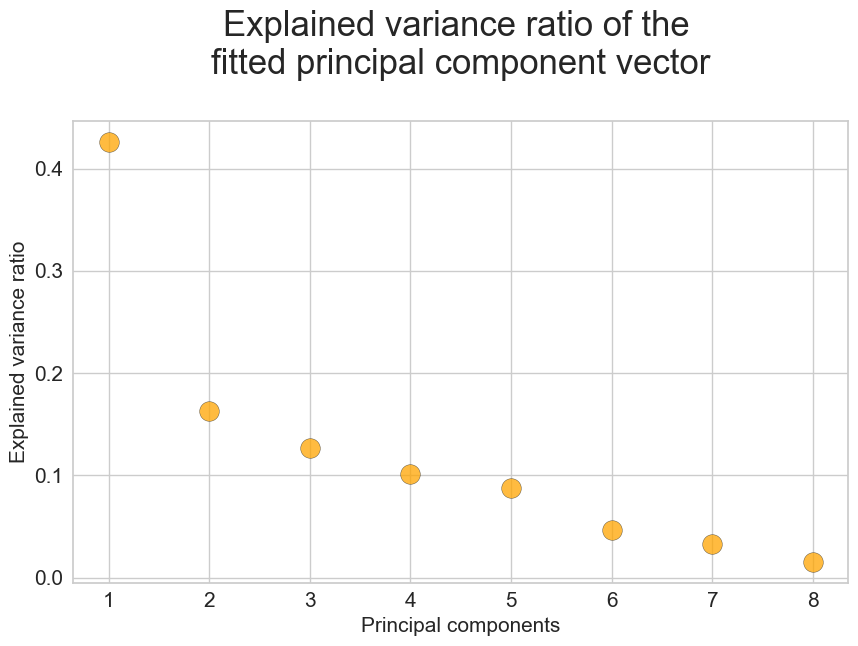

In [79]:
# PCA Full Model
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(scaledwno_pca.explained_variance_ratio_))],
            y=scaledwno_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(scaledwno_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1) The PCA revealed that PC1 accounted for 42.6% of the variance and PC2 was 16.2% for a combined 58.8% of the variance accounted for with just the first two components.

2) The correlation matrix showed that Region had low absolute values with the seven other features. It did not hold any great explanatory value. Channel, in comparison, held some high positive values, indicating the dominance of Retail channels in Milk and Detergents_Papers purchases. The negative correlation values for Channel indicated that Hotels/Cafes dominate in Fresh and Frozen purchases.

3) The similarities in graphs using all eight original features or a reduced model using only four suggest that the reduced model did not lose much explanatory power and could still acount for much of the variance. This is possibly due to certain features like Grocery having high correlations (>=0.73) with two other variables, so eliminating it did not change the model much.

4) The analyses here still had overlap in the clusters, based on the 3D graph from the KMeans and the 2D graph from the agglomerative clustering. It could be improved. However, the large influence of Channel on annual spending came through in the strong split into two clusters in hierarchical dendrogram. The two channels, hotels and cafes versus retail outlets, simply have very different spending patterns. Market segmentation could prove a winning sales strategy.